In [1]:
import brightway2 as bw
from premise import *
import pandas as pd
from itertools import product
import matplotlib.pyplot as plt
bw.projects.set_current("premise")

In [2]:
range_time = [False, True]
duration = [False, True]
foresight = [False, True]
lead_time = [False, True]
crr = [False, True]
measurement = range(0, 5)

In [3]:
keys = [range_time, duration, foresight, lead_time, crr, measurement]

In [4]:
combinations = list(product(*keys))
print(len(combinations))

160


{'range time': False, 'duration': False, 'foresight': False, 'lead time': False, 'capital replacement rate': False, 'measurement': 0}
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+-------------------------------------

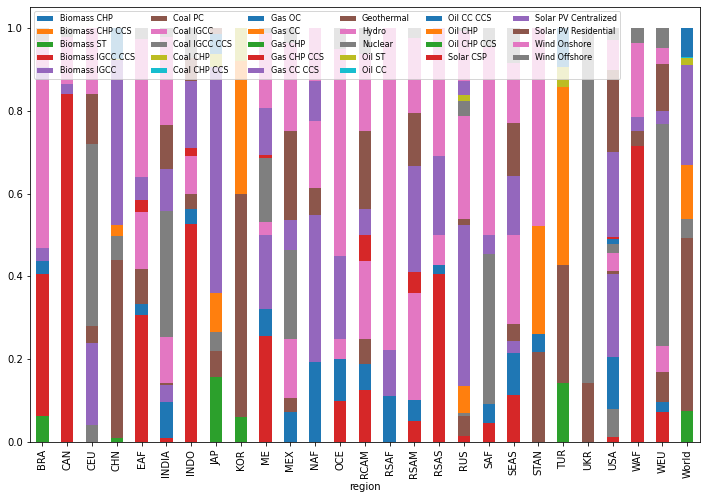

{'range time': False, 'duration': False, 'foresight': False, 'lead time': False, 'capital replacement rate': False, 'measurement': 1}
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+-------------------------------------

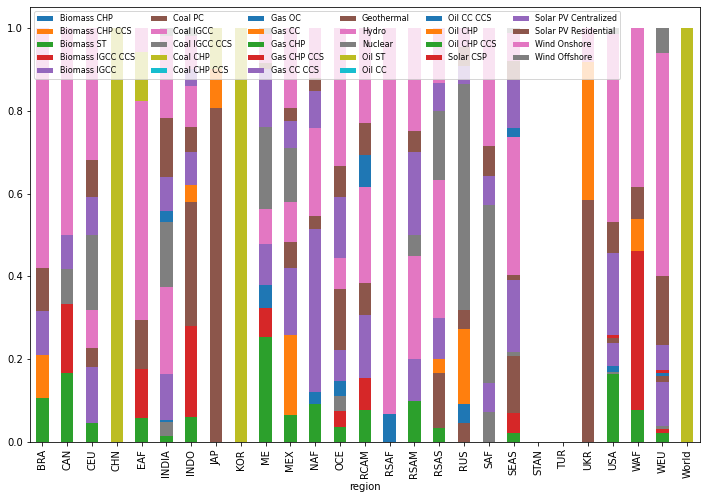

{'range time': False, 'duration': False, 'foresight': False, 'lead time': False, 'capital replacement rate': False, 'measurement': 2}
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+-------------------------------------

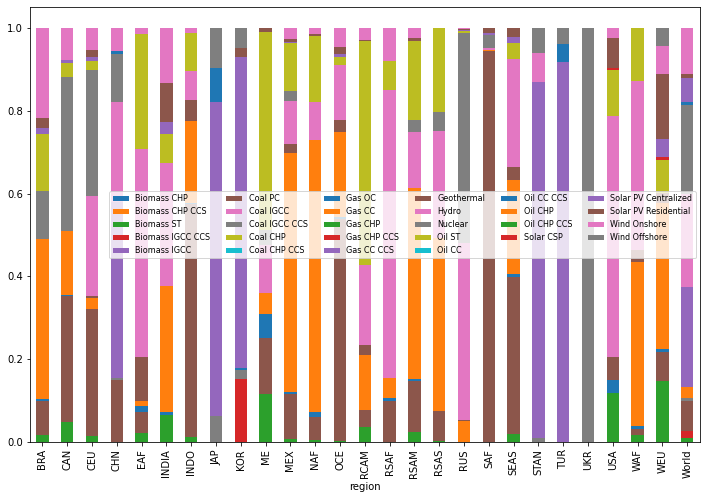

{'range time': False, 'duration': False, 'foresight': False, 'lead time': False, 'capital replacement rate': False, 'measurement': 3}
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+-------------------------------------

/Users/romain/GitHub/premise/premise/marginal_mixes.py:538: RuntimeWarning: divide by zero encountered in true_divide
  x = np.where(slope == 0, 0, slope / short_slope)


Done!


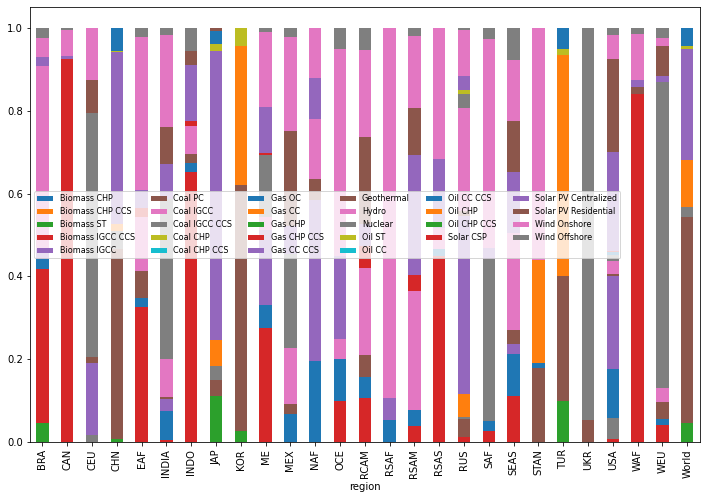

{'range time': False, 'duration': False, 'foresight': False, 'lead time': False, 'capital replacement rate': False, 'measurement': 4}
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+-------------------------------------

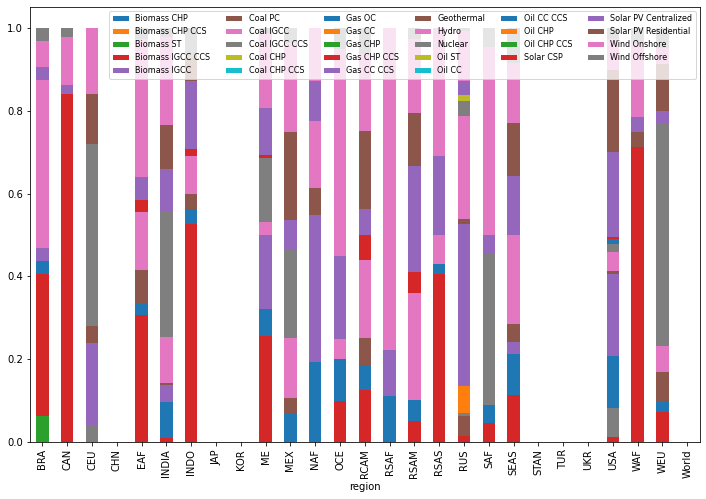

{'range time': False, 'duration': False, 'foresight': False, 'lead time': False, 'capital replacement rate': True, 'measurement': 0}
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+--------------------------------------

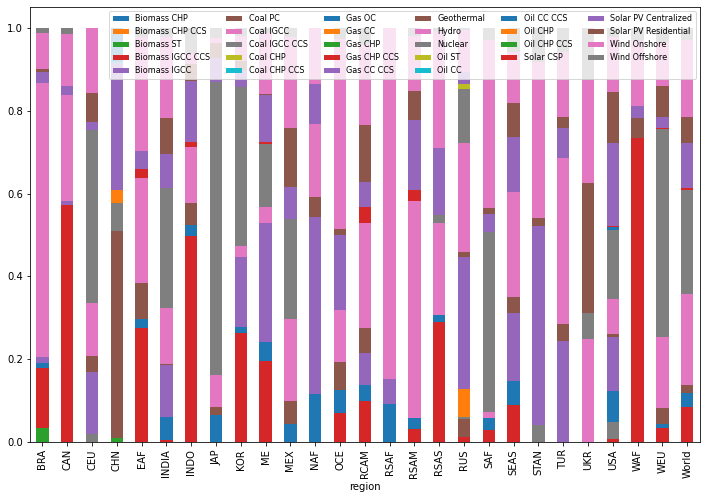

{'range time': False, 'duration': False, 'foresight': False, 'lead time': False, 'capital replacement rate': True, 'measurement': 1}
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+--------------------------------------

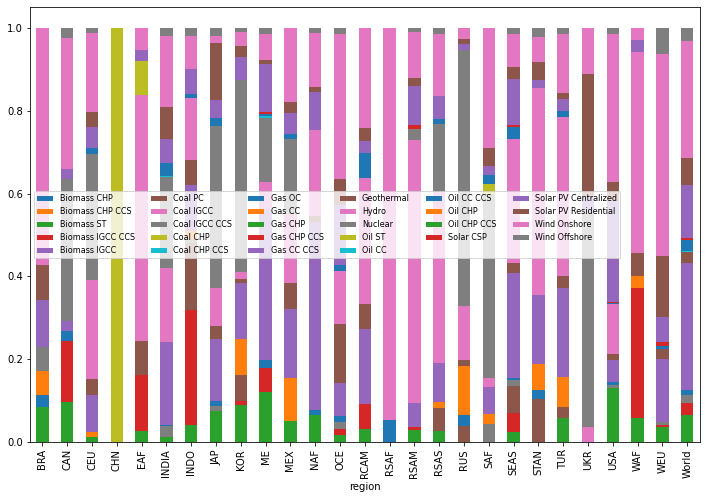

{'range time': False, 'duration': False, 'foresight': False, 'lead time': False, 'capital replacement rate': True, 'measurement': 2}
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+--------------------------------------

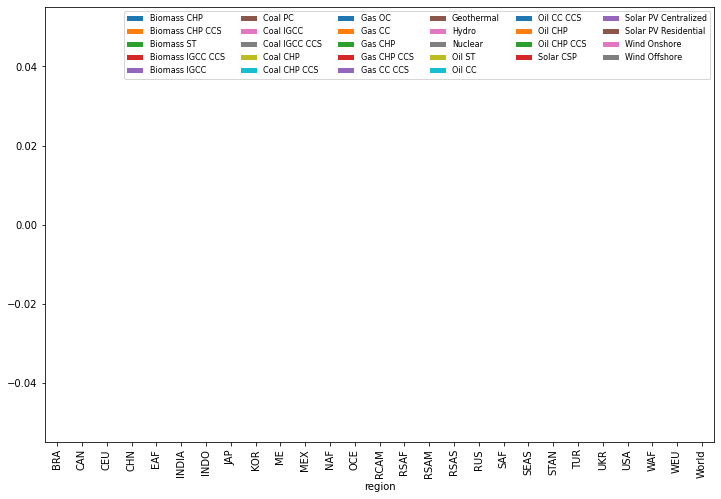

{'range time': False, 'duration': False, 'foresight': False, 'lead time': False, 'capital replacement rate': True, 'measurement': 3}
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+--------------------------------------

/Users/romain/GitHub/premise/premise/marginal_mixes.py:538: RuntimeWarning: divide by zero encountered in true_divide
  x = np.where(slope == 0, 0, slope / short_slope)


Done!


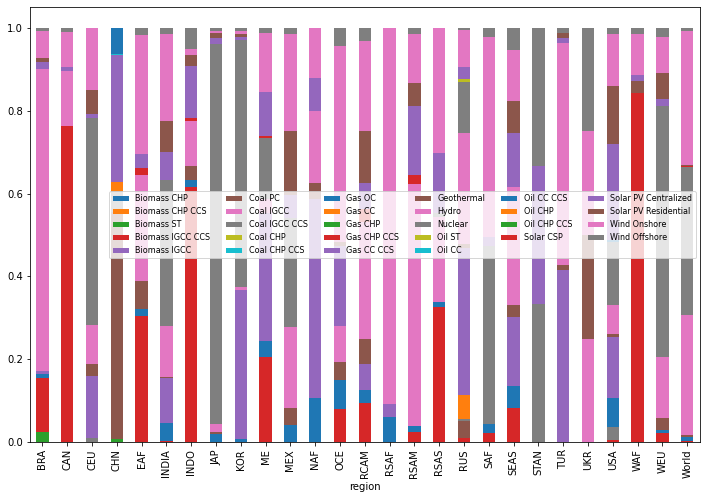

{'range time': False, 'duration': False, 'foresight': False, 'lead time': False, 'capital replacement rate': True, 'measurement': 4}
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+--------------------------------------

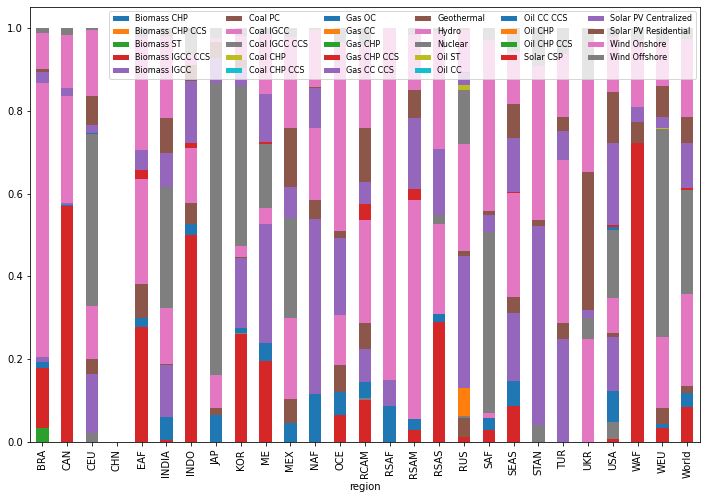

{'range time': False, 'duration': False, 'foresight': False, 'lead time': True, 'capital replacement rate': False, 'measurement': 0}
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+--------------------------------------

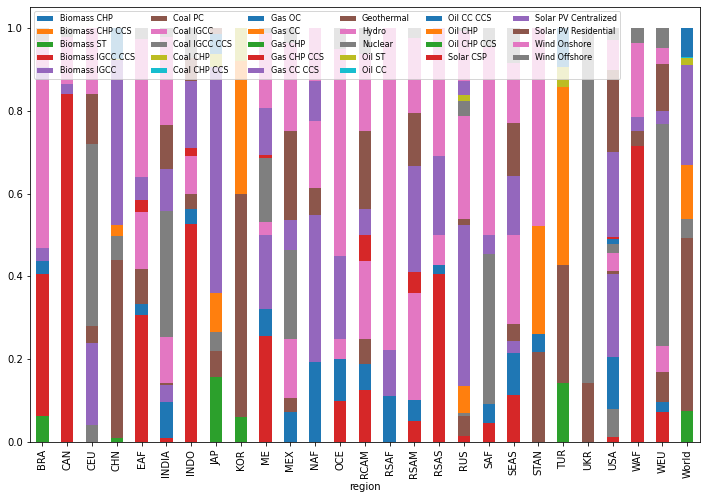

{'range time': False, 'duration': False, 'foresight': False, 'lead time': True, 'capital replacement rate': False, 'measurement': 1}
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+--------------------------------------

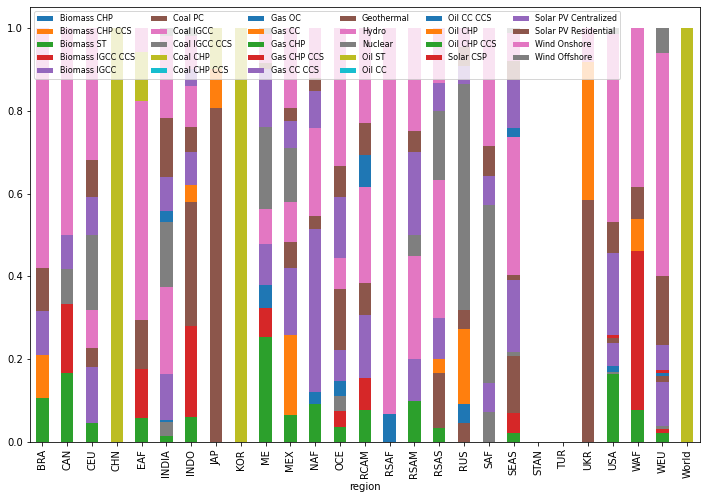

{'range time': False, 'duration': False, 'foresight': False, 'lead time': True, 'capital replacement rate': False, 'measurement': 2}
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+--------------------------------------

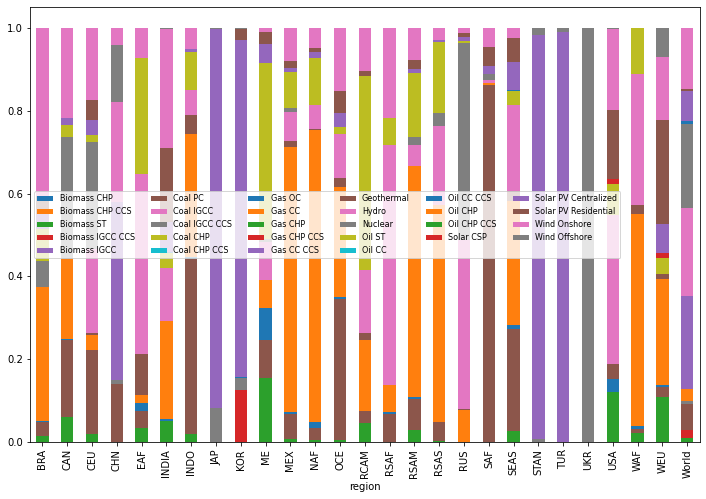

{'range time': False, 'duration': False, 'foresight': False, 'lead time': True, 'capital replacement rate': False, 'measurement': 3}
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+--------------------------------------

/Users/romain/GitHub/premise/premise/marginal_mixes.py:538: RuntimeWarning: divide by zero encountered in true_divide
  x = np.where(slope == 0, 0, slope / short_slope)
/Users/romain/GitHub/premise/premise/marginal_mixes.py:538: RuntimeWarning: divide by zero encountered in true_divide
  x = np.where(slope == 0, 0, slope / short_slope)
/Users/romain/GitHub/premise/premise/marginal_mixes.py:538: RuntimeWarning: divide by zero encountered in true_divide
  x = np.where(slope == 0, 0, slope / short_slope)


Done!


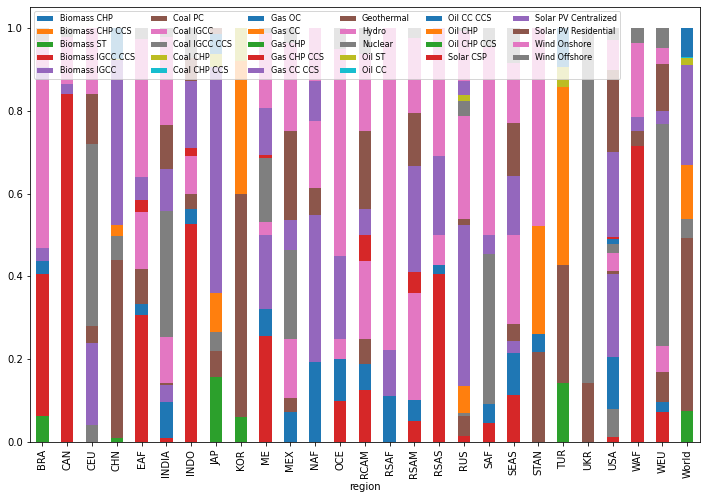

{'range time': False, 'duration': False, 'foresight': False, 'lead time': True, 'capital replacement rate': False, 'measurement': 4}
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+--------------------------------------

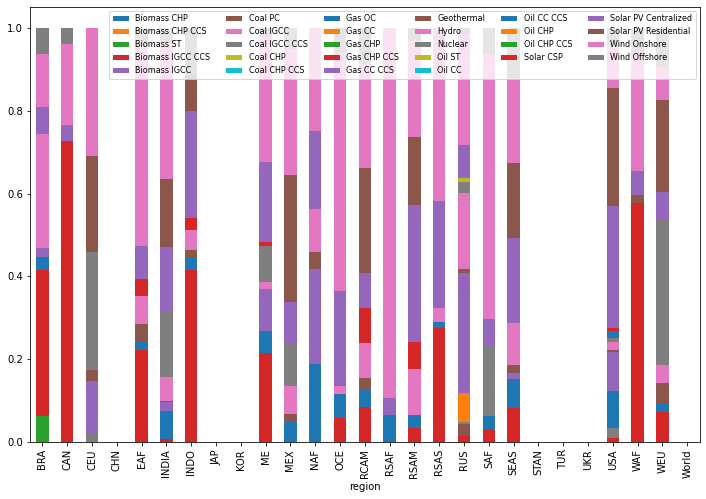

{'range time': False, 'duration': False, 'foresight': False, 'lead time': True, 'capital replacement rate': True, 'measurement': 0}
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+---------------------------------------

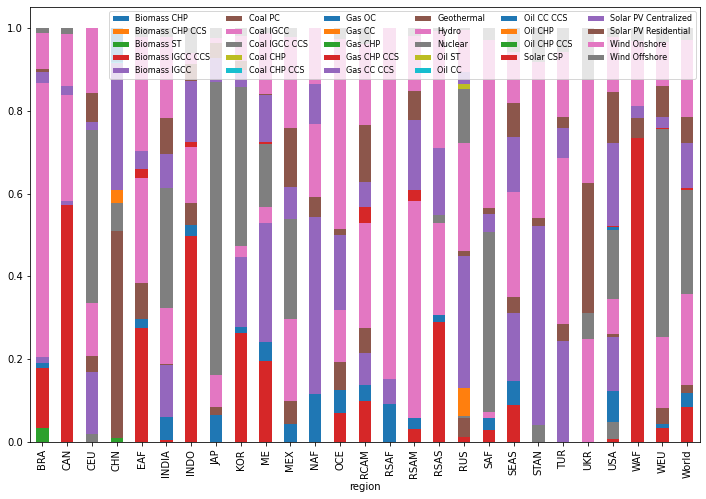

{'range time': False, 'duration': False, 'foresight': False, 'lead time': True, 'capital replacement rate': True, 'measurement': 1}
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+---------------------------------------

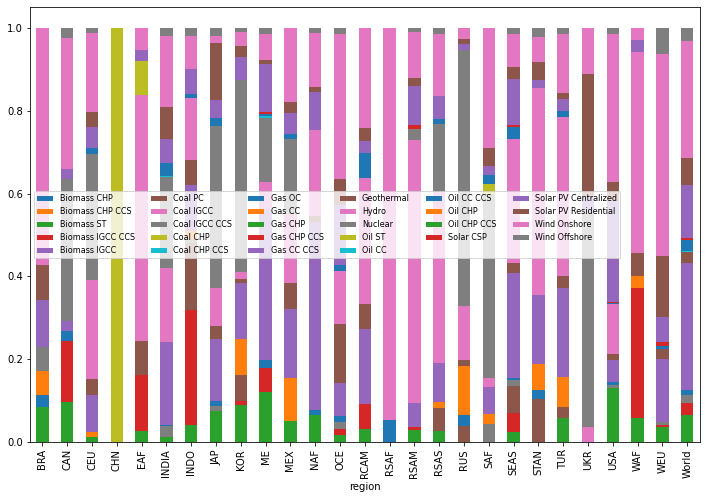

{'range time': False, 'duration': False, 'foresight': False, 'lead time': True, 'capital replacement rate': True, 'measurement': 2}
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+---------------------------------------

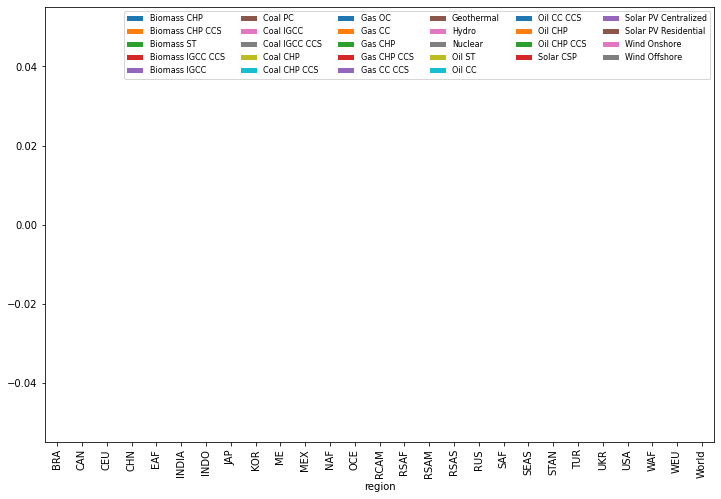

{'range time': False, 'duration': False, 'foresight': False, 'lead time': True, 'capital replacement rate': True, 'measurement': 3}
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+---------------------------------------

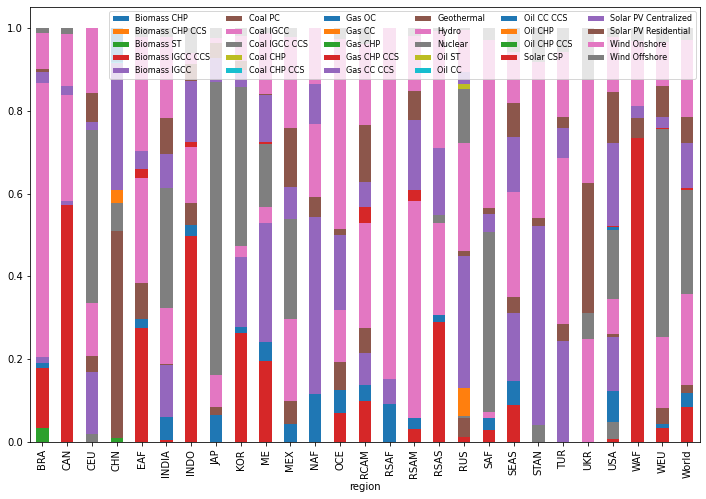

{'range time': False, 'duration': False, 'foresight': False, 'lead time': True, 'capital replacement rate': True, 'measurement': 4}
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+---------------------------------------

In [ ]:
for combination in combinations:
    
    k = ["range time", "duration", "foresight", "lead time", "capital replacement rate", "measurement"]
    args = dict(zip(k, combination))
    
    print(args)


    ndb = NewDatabase(
            scenarios = [
                {"model":"image", "pathway":"SSP2-RCP19", "year":2030},

            ],        
            source_db="ecoinvent 3.8 cutoff",
            source_version="3.8",
            key='tUePmX_S5B8ieZkkM7WUU2CnO8SmShwmAeWK9x2rTFo=',
            system_model="consequential",
            system_args = args
        )
    
    (ndb.iam_data.electricity_markets
     .to_dataframe("val")
     .groupby(["region", "variables"])
     .sum()
     .unstack()["val"]
    ).plot(kind="bar", stacked=True, figsize=(12, 8))
    plt.legend(ncol=6, fontsize=8)
    plt.show()

In [1]:
import brightway2 as bw
from premise import *
import pandas as pd
from itertools import product
import matplotlib.pyplot as plt
bw.projects.set_current("premise")

args = {'range time': False, 'duration': False, 'foresight': False, 'lead time': True, 'capital replacement rate': False, 'measurement': 3}

ndb = NewDatabase(
    scenarios = [
        {"model":"image", "pathway":"SSP2-RCP19", "year":2030},

    ],        
    source_db="ecoinvent 3.8 cutoff",
    source_version="3.8",
    key='tUePmX_S5B8ieZkkM7WUU2CnO8SmShwmAeWK9x2rTFo=',
    system_model="consequential",
    system_args = args
)

+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+------------------------------------------------------------------+

////////////////////// EXTRACTING SOURCE DATABASE //////////////////
Done!

//////////////////// IMPOR

/Users/romain/GitHub/premise/premise/marginal_mixes.py:540: RuntimeWarning: divide by zero encountered in true_divide
  print((slope / short_slope).shape)
/Users/romain/GitHub/premise/premise/marginal_mixes.py:542: RuntimeWarning: divide by zero encountered in true_divide
  x = np.where(slope == 0, 0, slope / short_slope)
/Users/romain/GitHub/premise/premise/marginal_mixes.py:540: RuntimeWarning: divide by zero encountered in true_divide
  print((slope / short_slope).shape)
/Users/romain/GitHub/premise/premise/marginal_mixes.py:542: RuntimeWarning: divide by zero encountered in true_divide
  x = np.where(slope == 0, 0, slope / short_slope)
/Users/romain/GitHub/premise/premise/marginal_mixes.py:540: RuntimeWarning: divide by zero encountered in true_divide
  print((slope / short_slope).shape)
/Users/romain/GitHub/premise/premise/marginal_mixes.py:542: RuntimeWarning: divide by zero encountered in true_divide
  x = np.where(slope == 0, 0, slope / short_slope)


Done!


In [ ]:
import xarray as xr

In [2]:
import numpy as np

In [ ]:
a = np.array([1, 2, 3, 4, ])